# SEMANA 3: SISTEMAS DE ECUACIONES
### INTEGRANTES | Participación:
### Calzada Leon, Yasser Paolo (100%)
### Cervera, Eslin Yair (100%)
### Aranda Huertas, Milene (0%)

### a. Lea la base de datos y elimine la variable ‘Newspaper’. Inserte como imagen las ecuaciones de regresión

In [12]:
import pandas as pd
import numpy as np

In [14]:
##Leemos la base de datos
data = pd.read_csv("Publicidad.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [16]:
#Eliminamos la variable Newspaper
data = data.drop(["Newspaper"], axis = 1)
data

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


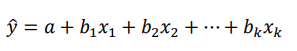

In [5]:
#Insertamos las imágenes
from IPython.display import Image
Image("im1.PNG")

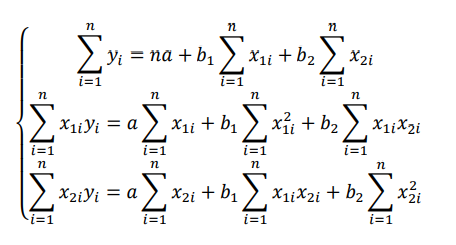

In [7]:
Image("im2.PNG")

### b. . Calcule todas las sumatorias del sistema de ecuaciones e imprima la matriz de coeficientes A y la matriz de términos independientes b.


## Realizamos las sumatorias del sistema de ecuaciones

In [37]:
suma_y = sum(data["Sales"])
suma_y

2804.5

In [39]:
suma_x1 = sum(data["TV"])
suma_x1

29408.5

In [41]:
suma_x2 = sum(data["Radio"])
suma_x2

4652.8

In [43]:
#sum_x1 al cuadrado
suma_x12 = sum(data["TV"]**2)
suma_x12 

5791118.39

In [45]:
#sum_x2 al cuadrado
suma_x22 = sum(data["Radio"]**2)
suma_x22 

152107.86

In [47]:
suma_x1x2 = sum(data["TV"]*data["Radio"])
suma_x1x2

698061.98

In [56]:
#y*x1
suma_yx1 = sum(data["TV"]*data["Sales"])
suma_yx1

482108.34

In [60]:
#y*x2
suma_yx2 = sum(data["Radio"]*data["Sales"])
suma_yx2

74126.39

## Ahora imprimimos la matriz de coeficientes A

In [68]:
A = np.array([(200, suma_x1, suma_x2),(suma_x1, suma_x12, suma_x1x2), (suma_x2, suma_x1x2, suma_x22)])
A

array([[2.00000000e+02, 2.94085000e+04, 4.65280000e+03],
       [2.94085000e+04, 5.79111839e+06, 6.98061980e+05],
       [4.65280000e+03, 6.98061980e+05, 1.52107860e+05]])

## Imprimimos la matriz de términos independientes

In [66]:
b = np.array([(suma_y, suma_yx1, suma_yx2)])
b

array([[  2804.5 , 482108.34,  74126.39]])

In [70]:
detA = np.linalg.det(A)
detA

12829782120021.764

In [74]:
invA = np.linalg.inv(A)
x_sol = np.dot(invA, b.T)
x_sol

array([[2.92109991],
       [0.04575482],
       [0.18799423]])

### c. Aplique el método de la inversa para resolver dicho sistema. Verifique que se obtienen los mismos resultados al utilizar la función ‘LinearRegressión’ de la librería ‘sklearn’. Además, muestre los coeficientes en un data frame y escriba la ecuación de regresión estimada.

In [88]:
X = data[["TV", "Radio"]]
y = data["Sales"]
from sklearn.linear_model import LinearRegression
rls = LinearRegression()
rls.fit(X,y)

LinearRegression()

In [94]:
coef1 = pd.DataFrame(rls.coef_, ["TV", "Radio"], columns=["Coeficientes"])
coef2 = pd.DataFrame([rls.intercept_], ["Intercepto"], columns=["Coeficientes"])
coeficientes = pd.concat([coef1, coef2], axis=0)
coeficientes

,Coeficientes
TV,0.045755
Radio,0.187994
Intercepto,2.921100


In [96]:
print("Sales_esti = {:.4f}TV + {:.4f}Radio + {:.4f}".format(
    coeficientes["Coeficientes"][0],  # Coeficiente de TV
    coeficientes["Coeficientes"][1],  # Coeficiente de Radio
    coeficientes["Coeficientes"][2]   # Intercepto
))

Sales_esti = 0.0458TV + 0.1880Radio + 2.9211


C:\Users\PAOLO\AppData\Local\Temp\ipykernel_6460\1616247960.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coeficientes["Coeficientes"][0],  # Coeficiente de TV
C:\Users\PAOLO\AppData\Local\Temp\ipykernel_6460\1616247960.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  coeficientes["Coeficientes"][1],  # Coeficiente de Radio
C:\Users\PAOLO\AppData\Local\Temp\ipykernel_6460\1616247960.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.il